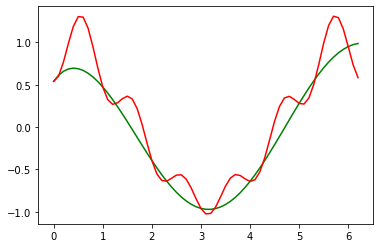

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#Takes in an even function f, knots of interpolation A, and x-value x
#Outputs element of best interpolation in Tn as long as f is an even function
 
def elementOfBestApproximationEven(f,A,x):
    L = len(A)
    coefficients = np.empty(L)
    numeratorProducts = np.asarray([np.cos(x)-np.cos(p) for p in A])
    denominatorDifferences = np.empty((L,L))
    indexList = np.asarray([i for i in range(L)])
    imageOfA = np.asarray([f(y) for y in A])
    
    for i in indexList:
        for j in indexList:
            denominatorDifferences[i,j]=np.cos(A[i])-np.cos(A[j])
    
    
    for i in indexList:
        coefficients[i] = np.prod(numeratorProducts[indexList !=i])/np.prod(denominatorDifferences[i][indexList !=i])
    
    return np.dot(imageOfA,coefficients)
 
 
#How to document code. When a user runs help(elementOfBestApproximation) the following string is displayed
elementOfBestApproximationEven.__doc__ =  " Evaluates the element of best approximation in Tn for an even 2pi-periodic function at x, given a function f and a dataset A"
    
def g(x):
    return np.cos(1/(x+1))*np.cos(x)
 
testPoints = np.arange(0, 2*np.pi,1)
 
 
x1 = np.arange(0,2*np.pi,.1)
y1 = g(x1)
 
x2 = np.arange(0,2*np.pi,.1)
y2 = np.asarray([elementOfBestApproximationEven(g,testPoints, q) for q in x2])
 
plt.plot(x1,y1, color = 'green')
plt.plot(x2,y2, color = 'red')
plt.show();

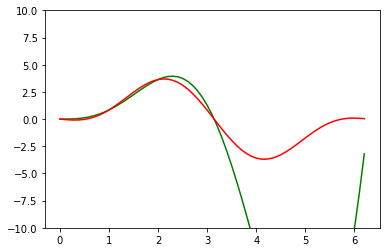

In [ ]:
#special cases of interpolation by trigonometric polynomials

import numpy as np
import matplotlib.pyplot as plt
#Takes in an even function f, knots of interpolation A, and x-value x
#Outputs element of best interpolation in Tn as long as f is an odd function

def elementOfBestApproximationOdd(f,A,x):
    L = len(A)
    coefficients = np.empty(L)
    numeratorProducts = np.asarray([np.cos(x)-np.cos(p) for p in A])
    denominatorDifferences = np.empty((L,L))
    indexList = np.asarray([i for i in range(L)])
    imageOfA = np.asarray([f(y)*(np.sin(x)/np.sin(y)) for y in A])
    
    for i in indexList:
        for j in indexList:
            denominatorDifferences[i,j]=np.cos(A[i])-np.cos(A[j])
    
    
    for i in indexList:
        coefficients[i] = np.prod(numeratorProducts[indexList !=i])/np.prod(denominatorDifferences[i][indexList !=i])
    
    return np.dot(imageOfA,coefficients)


#How to document code. When a user runs help(elementOfBestApproximation) the following string is displayed
elementOfBestApproximationOdd.__doc__ =  " Evaluates the element of best approximation in Tn for an odd 2pi-periodic function at x, given a function f and a dataset A"
    
def g(x):
    return (x**2)*np.sin(x)

testPoints = [1,2]

elementOfBestApproximationOdd(g,testPoints,1.4)

x1 = np.arange(0,2*np.pi,.1)
y1 = g(x1)

x2 = np.arange(0,2*np.pi,.1)
y2 = np.asarray([elementOfBestApproximationOdd(g,testPoints, q) for q in x2])

plt.plot(x1,y1, color = 'green')
plt.plot(x2,y2, color = 'red')
plt.ylim((-10,10))
plt.show();

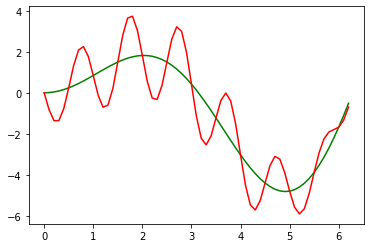

In [ ]:
#Playing with interpolation by trigonometric polynomials

import numpy as np
import matplotlib.pyplot as plt
#Takes in a function f, knots of interpolation A, and x-value x
#Outputs evaluation of element of best approximation in Tn at x given f and A
def elementOfBestApproximationTn(f,A,x):
    L = len(A)
    if L%2 == 1:
      print("Error: Length of A must ben even.")
      return None 
    else: 
      coefficients = np.empty(L)
      numeratorProducts = np.asarray([np.sin((x-p)/2) for p in A])
      denominatorDifferences = np.empty((L,L))
      indexList = np.asarray([i for i in range(L)])
      imageOfA = np.asarray([f(y) for y in A])

      for i in indexList:
        for j in indexList:
          denominatorDifferences[i,j]=np.sin((A[i]-A[j])/2)
      
      for i in indexList:
        coefficients[i]=np.prod(numeratorProducts[indexList != i])/np.prod(denominatorDifferences[i][indexList != i])

      return np.dot(imageOfA, coefficients)

def g(x):
  return x*np.sin(x)


testPoints=[0,.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5]
x1 = np.arange(0,2*np.pi,.1)
y1 = g(x1)

x2 = np.arange(0,2*np.pi,.1)
y2 = np.asarray([elementOfBestApproximationTn(g,testPoints, q) for q in x2])

plt.plot(x1,y1, color = 'green')
plt.plot(x2,y2, color = 'red')
plt.show();

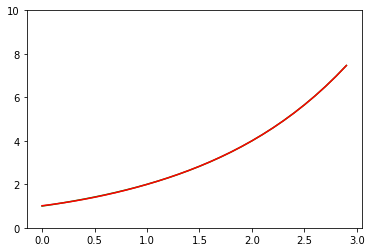

In [ ]:
#Playing with Lagrange interpolation

import numpy as np
import matplotlib.pyplot as plt
#Takes in a function f, knots of interpolation A, and x-value x
#Outputs evaluation of Lagrange Interpolation at x given f and A
def lagrangeInterpolation(f,A,x):
  L = len(A)
  coefficients = np.empty(L)
  numeratorProducts = np.asarray([x-p for p in A])
  denominatorDifferences = np.empty((L,L))
  indexList = np.asarray([i for i in range(L)])
  imageOfA = np.asarray([f(y) for y in A])
    
  for i in indexList:
    for j in indexList:
      denominatorDifferences[i,j]= A[i]-A[j]
    
    
  for i in indexList:
    coefficients[i] = np.prod(numeratorProducts[indexList !=i])/np.prod(denominatorDifferences[i][indexList !=i])
    
  return np.dot(imageOfA,coefficients)
 
#Computes divided differences of a function f over a List of points A
def dividedDifferences(f,A):
  L=len(A)
  indexList = np.asarray([k for k in range(L)])
  denominatorDifferences = np.empty((L,L))
  summand = np.asarray([f(y) for y in A])
  
  for i in range(L):
    for j in range(L):
      denominatorDifferences = A[i]-A[j]
    
  for i in range(L):
    summand[i]=summand[i]/np.prod(denominatorDifferences[i][indexList !=i])
  
  return np.sum(summand)
#Computes the error of the Lagrange Interpolation of f at x
#def errorOfLagrangeInterpolationAtX(f,x,A):
  
 
  
 
 
 
 
 
 
 
 
 
 
 
def g(x):
  return 2**x
 
 
testPoints=3*np.random.random_sample(5)
x1 = np.arange(0,3,.1)
y1 = g(x1)
 
x2 = x1
y2 = np.asarray([lagrangeInterpolation(g,testPoints, q) for q in x2])
 
plt.plot(x1,y1, color = 'green')
plt.plot(x2,y2, color = 'red')
plt.ylim((0,10))
plt.show();

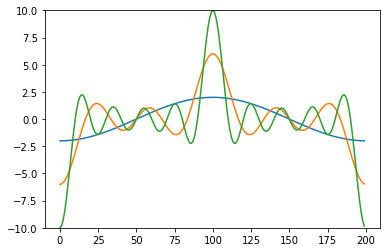

In [ ]:
#graphing dirichlet kernels to see what they look like

import matplotlib.pyplot as plt
import numpy as np
def dirichletKernel(x,N):
  if isinstance(x,int):
    return 2*N+1
  else: 
    return (np.sin(2*np.pi*(2*N+1)*x))/(np.sin(np.pi*x))

xVals=np.arange(-1,1,.01)
plt.ylim(-10,10)
for k in range(3):
  plt.plot(dirichletKernel(xVals,k), label="k")

plt.show()


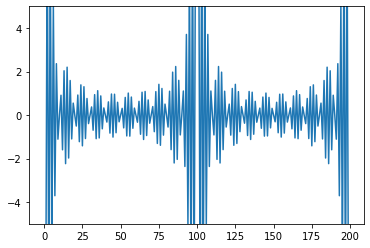

In [ ]:
#Graphing dirichlet kernels to see what they look like 

import matplotlib.pyplot as plt
import numpy as np
def dirichletKernel(x,N):
  if isinstance(x,int):
    return 2*N+1
  else: 
    return (np.sin(2*np.pi*(2*N+1)*x))/(np.sin(np.pi*x))

xVals=np.arange(-1,1,.01)
plt.ylim(-5,5)
#for k in range(100):
 # plt.plot(dirichletKernel(xVals,k), label="k")
plt.plot(dirichletKernel(xVals,22))
plt.show()

In [ ]:
plt.ylim

(0, 10)

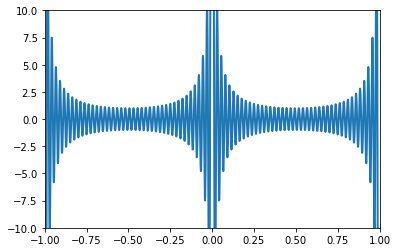

In [ ]:
#Animates dirichlet kernels as n increases
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import IPython.display

def dirichletKernel(x,N):
  if isinstance(x,int):
    return 2*N+1
  else: 
    return (np.sin(2*np.pi*(2*N+1)*x))/(np.sin(np.pi*x))

fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-10, 10))
line, = ax.plot([], [], lw=2)    

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.arange(-1,1,.001)
    y = dirichletKernel(x,i+1)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=20, blit=True)
anim.save('basic_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#this makes the animation work in colab
rc('animation',html='jshtml')
anim



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  # Remove the CWD from sys.path while we load stuff.


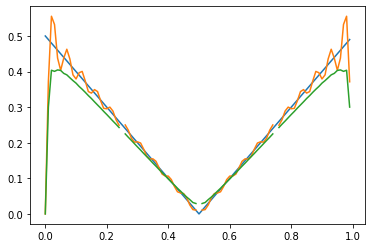

In [ ]:
#plots  Sn(f), fejer kernel convolved with f, and f in same window 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp


#computes convolution of f and g at x
def convolution(f,g,x):
  return sp.quad(lambda y: f(y)*g(x-y), 0,1 )[0]

def f(x):
  return np.abs(x-1/2)

def dirichletKernel(x,N):
  if isinstance(x,int):
    return 2*N+1
  else: 
    return (np.sin(2*np.pi*(2*N+1)*x))/(np.sin(np.pi*x))

def fejerKernel(x,N):    
  return (1/N)*sum([dirichletKernel(x,k) for k in range(N-1) ])

def h(x,N):
  return convolution(f,lambda y: dirichletKernel(y,N),x)

def g(x,N):
  return convolution(f,lambda y: fejerKernel(y,N),x)
#Does KN(f) converge more slowly than SN(f)? 
#Convergence of KN(f) looks more uniform though. Quantify this by less total variation? ||Kn(f)||_{TV} < ||SN(f)||_{TV}? 

xVal = np.arange(0,1,.01)
yVal1 = np.asarray([h(a,10) for a in xVal])
yVal2 = f(xVal)
yVal3 = np.asarray([g(a,20) for a in xVal])
plt.plot(xVal,yVal2)
plt.plot(xVal,yVal1)
plt.plot(xVal,yVal3)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


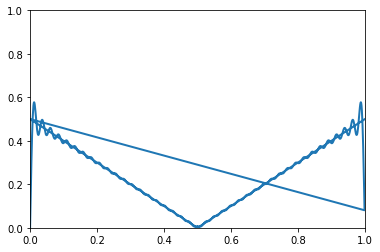

In [ ]:
#Demonstrates the cconvergence of Sn(f) to f as n gets larger
# rate of convergence of Sn(f) to f is given by jackson's theorem. 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import IPython.display
import scipy.integrate as sp

def dirichletKernel(x,N):
  if isinstance(x,int):
    return 2*N+1
  else: 
    return (np.sin(2*np.pi*(2*N+1)*x))/(np.sin(np.pi*x))

def convolution(f,g,x):
  return sp.quad(lambda y: f(y)*g(x-y), 0,1 )[0]

def f(x):
  return np.abs(x-1/2)

def h(x,N):
  return convolution(f,lambda y: dirichletKernel(y,N),x)


fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
line, = ax.plot([], [], lw=2)    



def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.arange(0,1,.001)
    y = np.asarray([h(a,i+1) for a in x])
    line.set_data([x,x], [y,f(x)])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=20, blit=True)
anim.save('basic_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
#this makes the animation work in colab
rc('animation',html='jshtml')
anim

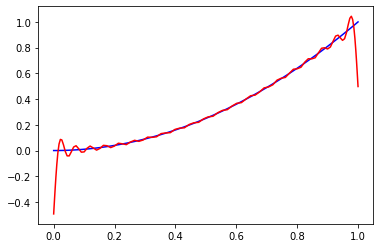

In [ ]:
#playing with chebyshev nodes
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp

def chebyshevNodes(a,b,N):
  X=[(1/2)*(a+b)+(1/2)*(b-a)*np.cos(((2*(k+1)-1)/(2*N))*np.pi) for k in range(N)]
  return np.asarray(X)

def dirichletKernel(x,N):
  if isinstance(x,int):
    return 2*N+1
  else: 
    return (np.sin(2*np.pi*(2*N+1)*x))/(np.sin(np.pi*x))

def convolution(f,g,x):
  return sp.quad(lambda y: f(y)*g(x-y), 0,1 )[0]

def f(x):
  return x**2

def h(x,N):
  return convolution(f,lambda y: dirichletKernel(y,N),x)

xVals = chebyshevNodes(0,1,100)
yVals1 = f(xVals)
yVals2 = np.asarray([h(a,10) for a in xVals])

#Using chebyshev nodes didn't do anything for this example because convolving with the dirichlet kernel is a global operation not a local operation. 
plt.plot(xVals,yVals1)
plt.plot(xVals,yVals2)
plt.show()

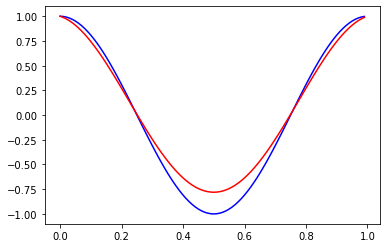

In [ ]:
#shows uniform convergence of approximation by bernstein operators 
#berstein polynomials approximate functions in C[0,1] with || f - Bn(f)|| <3mc(f,1/(2sqrt(n)))
import numpy as np 
import matplotlib.pyplot as plt


def ncr(n,k):
  numerators = [n-i for i in range(k)]
  denominators = [i+1 for i in range(k)]
  return np.prod(numerators)/np.prod(denominators)

def bernsteinOperator(f,x,N):
  coefficients = np.asarray([ncr(N,k)*f(k/N) for k in range(N+1)])
  xValues = np.asarray([(x**k)*((1-x)**(N-k)) for k in range(N+1)])
  return np.dot(coefficients,xValues)


def f(x):
  return np.cos(2*np.pi*x)

def h(x):
  return bernsteinOperator(f,x,20)

xVals = np.arange(0,1,.01)
yVals1 = f(xVals)
yVals2 = h(xVals)

plt.plot(xVals,yVals1, 'b')
plt.plot(xVals,yVals2, 'r')

plt.show()

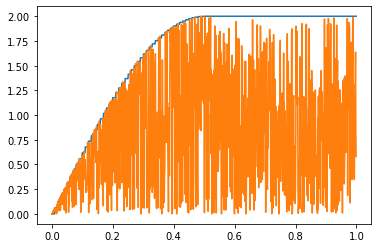

2.0

In [ ]:
#approximate modulus of continuity using stochastic gradient ascent? 

import numpy as np 
import matplotlib.pyplot as plt
import random as random

#approximates the modulus of continuity of a function on a closed interval [A,B] using stochastic gradient ascent
#high iterations take a long time for some functions, like cosine and sine

def modulusOfContinuityStochastic(f,t,A,B):
  #Should check that t<diam([A,B])
  fPrime = lambda x,y : np.sign(f(x)-f(y))*((f(x+.0001)-f(x))/.0001)
  eta = 1
  #choose initial x and y randomly
  x=A+random.uniform(A,B)
  s=t
  while x+s>B:
    s=s/2
  y=x+s
  xNext = None
  yNext =None
  
  #print([x,y])
  #iterate ascent 5 times and reduce ascent rate every time x,y become too large
  for i in range(3):
    #eta = eta*(1/(3-i))
    eta = eta*.5  #get almost same result even if learning rate is varied differently

    xNext = x #previous xNext and yNext became too large, so must correct before next iteration
    yNext =y
    #print([t,x,y])
    while ((np.abs(xNext-yNext)<t) and (A<=xNext) and (xNext<=B) and (A<=yNext) and (yNext <= B)) :
      x = xNext
      y = yNext
      #xNext = x + eta*fPrime(x,y)
      #yNext = y + eta*fPrime(y,x)
      xPlus = x + eta*fPrime(x,y)
      yPlus = y + eta*fPrime(y,x)
      xMinus = x - eta*fPrime(x,y)
      yMinus = y - eta*fPrime(y,x)
      
      if np.abs(f(xPlus)-f(yPlus)) < np.abs(f(xMinus)-f(yPlus)):
        xNext = xMinus
        if np.abs(f(xMinus)-f(yPlus))<np.abs(f(xMinus)-f(yMinus)):
          yNext = yMinus
        else:
          yNext = yPlus
      else:
        xNext = xPlus
        if np.abs(f(xPlus)-f(yPlus)) < np.abs(f(xPlus)-f(yMinus)):
          yNext = yMinus
        else:
          yNext = yPlus
          
      
        

    
  return np.abs(f(x)-f(y))


#This takes much longer than the stochastic version, but seems to be wayyy more accurate
def modulusOfContinuityDeterministic(f,t,A,B):
  partitionSize = 100
  partition = [A + k*((B-A)/partitionSize) for k in range(partitionSize+1)]
  
  maximum = np.abs(f(A)-f(B))
  #Lots of redundant calculations. Reduce to only computing pairs of points then shifting? 
  for i in range(partitionSize +1):
    for j in range(partitionSize +1):
      if np.abs(partition[i]-partition[j])<t and np.abs(f(partition[i])-f(partition[j]))>maximum:
        maximum = np.abs(f(partition[i])-f(partition[j]))
  
  return maximum






def f(x):
  return np.cos(np.pi*2*x)
  

def h(t):
  #
  return modulusOfContinuityDeterministic(f,t,0,1)

def l(t):
  return modulusOfContinuityStochastic(f,t,0,1)

xVals = np.arange(0,1,.001)
yVals1 = np.asarray([h(t) for t in xVals])
yVals2 = np.asarray([l(t) for t in xVals])
plt.plot(xVals,yVals1) 
plt.plot(xVals,yVals2)
plt.show()

# Why does stochastic method stop working after |f(x)-f(y)| reaches maximum on that interval?
